# Do 5% of adelie penguins have large flippers? (flippers greater than 200 mm)



In [2]:
%pip install palmerpenguins

In [35]:
from palmerpenguins import load_penguins
import numpy as np
import pandas as pd

penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [36]:
# keep only adelie penguins

print(len(penguins))
print(penguins['species'].value_counts())
penguins = penguins[penguins['species'] == 'Adelie'].copy()
print(len(penguins))

344
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
152


In [37]:
# remove penguins with no flipper length data

print(len(penguins))
penguins = penguins.dropna(subset=['flipper_length_mm'])
print(len(penguins))

152
151


In [38]:
# calculate proportion of penguins with large feet in the sample

large_feet = penguins[penguins['flipper_length_mm'] > 200]
large_feet_prop_samp = len(large_feet) / len(penguins)
print(large_feet_prop_samp)

0.046357615894039736


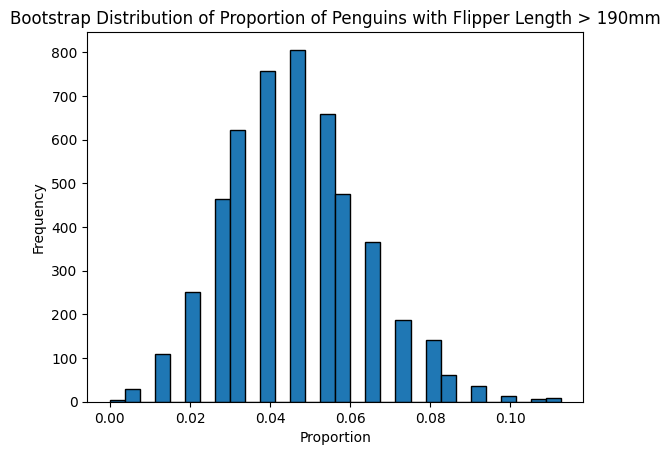

In [39]:
# calculate bootstrap proportions of penguins with large feet

def prop_large_flippers(data, threshold=200):
  return np.mean(data['flipper_length_mm'] > threshold)

n_iter = 5000
bootstrap_samples = []

for i in range(n_iter):
  sample = penguins.sample(len(penguins), replace=True)
  bootstrap_samples.append(prop_large_flippers(sample))

# Plot the bootstrap distribution
import matplotlib.pyplot as plt
plt.hist(bootstrap_samples, bins=30, edgecolor='black')
plt.title("Bootstrap Distribution of Proportion of Penguins with Flipper Length > 190mm")
plt.xlabel("Proportion")
plt.ylabel("Frequency")
plt.show()

# Calculate and print the mean and standard error of the bootstrap distribution
mean_bootstrap = np.mean(bootstrap_samples)
std_error_bootstrap = np.std(bootstrap_samples)

In [41]:
# hypothesize the proportion is 5%

large_feet_prop_hyp = 0.05

In [42]:
# calculate z score

z_score = (large_feet_prop_samp - large_feet_prop_hyp) / std_error_bootstrap
print(z_score)

-0.21069928605979737


In [44]:
# calculate p value
from scipy.stats import norm

# use two tailed test because testing if proportion is not 5%.
p_value = 2 * norm.cdf(z_score)
print(p_value)

0.5834390341291089


There is a 58% chance of observing this sample or something more extreme if the null hypothesis is true. Since 0.58 is greater than the threshold value of 0.05 we do not reject the null hypothesis.

In [45]:
# calculate confidence interval

lower = np.quantile(bootstrap_samples, 0.025)
upper = np.quantile(bootstrap_samples, 0.975)
print(lower, upper)

0.013245033112582781 0.08609271523178808


We are 95% confident that the true proportion of penguins with large flippers is between 1.3% and 8.6%.